In [19]:
from math import cos, pi
from numpy.core.numeric import indices
from numpy.random import random_integers
import re
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [20]:
class individual:
    def __init__(self,a,b,c):
        self.numbers = [a,b,c]
        self.values = []
        self.weight = 0

    def __repr__(self):
        return (str)([self.numbers,self.values, self.weight])

    def getvalues(self,exact):
        for i in exact:
            value = 0
            for n in range((int)(self.numbers[2])+1):
                value += self.numbers[0]**n*cos(self.numbers[1]**n*pi*i)
            self.values.append(value)

    def resetvalues(self):
        self.values = []



    def setweight(self,exact):
        self.weight = cost(self.values,exact)


    def generate(nindividuals):
        generation0 = []
        for i in range(nindividuals):
            a = random.random()
            b = random.randint(0,20)
            c = random.randint(0,20)
            generation0.append(individual(a,b,c))
        return generation0

In [21]:
def getdataset(file):
    dataset_array = []
    with open(fr"C:\Users\cg170794\Documents\{file}","r",encoding="utf-8") as dataset:

        dataset_array = re.findall(r'[^\n]+', dataset.read())[1::]

    return [x.split(";") for x in dataset_array]
    
def cost(found, exact):

    error = 0
    for i in range(len(found)):
        error += abs(exact[i] - found[i])
    return error/len(found)


def random_combine(parents):
    weights = [(x.weight)**-1 for x in parents]
    children = []
    for i in range((int)(len(parents)/2)):
        dad = random.choices(parents,weights = weights)
        mum = random.choices(parents,weights = weights)

        dad_mask = np.random.randint(2, size = 3)
        mum_mask = np.logical_not(dad_mask)
        child = np.add(np.multiply(dad[0].numbers, dad_mask), np.multiply(mum[0].numbers, mum_mask))
        child = individual(child[0],child[1],child[2])
        children.append(child)
    parents.sort(key = lambda x: x.weight)
    return parents[(int)(len(parents)/2):] + children


def mutation(parents, nmutations):


    mutated = [parents.pop(random.randrange(len(parents))) for x in range(nmutations)]

    for i in mutated:
        amount = random.randint(1,3)
        
        for j in range(amount):
            tochange = random.sample([0,1,2], k = amount)
            
            for k in tochange:
                if k == 0:
                    i.numbers[k] = random.random()
                    
                else:
                    i.numbers[k] = random.randint(0,20)
                    
    return parents + mutated 


def addvalues(generation,exact):
    for i in generation:
        i.getvalues(exact)

In [22]:
def predict( generation,timedata,results, generationnumbers):
    evolution = []
    for i in range(generationnumbers):
        
        for j in generation:
            j.resetvalues()


        addvalues(generation, timedata)
        
        for individuale in generation:
            individuale.setweight(results)


        minweight = min([x.weight for x in generation])
        generation.sort(key = lambda x: x.weight)
        print("generation {} ".format(i), minweight)
        print("Best numbers: {}".format(generation[0].numbers))
        if minweight ==0:
            break
        evolution.append(minweight)
        generation = random_combine(generation)
        generation = mutation(generation, 2)
    return evolution


In [23]:
dataset = getdataset("samples.csv")

timedata = [(float)(x[0]) for x in dataset]
results = [(float)(x[1]) for x in dataset]


generation = individual.generate(500)

start = time.time()
evolution = predict(generation,timedata,results,25)
end = time.time()

print("time taken: {}s".format(end - start))



generation 0  0.04837736558779369
Best numbers: [0.3394682748344805, 15, 17]
generation 1  0.04837736314009486
Best numbers: [0.3394682748344805, 15.0, 15.0]
generation 2  0.04818788924948848
Best numbers: [0.39190212915338785, 15.0, 3.0]
generation 3  0.04215209707799818
Best numbers: [0.34148118747703027, 15.0, 3.0]
generation 4  0.04215209707799818
Best numbers: [0.34148118747703027, 15.0, 3.0]
generation 5  0.03697151285616708
Best numbers: [0.3394682748344805, 15.0, 2.0]
generation 6  0.04215209707799818
Best numbers: [0.34148118747703027, 15.0, 3.0]
generation 7  0.03694173139320099
Best numbers: [0.34145766607247197, 15.0, 2.0]
generation 8  0.03694137451961204
Best numbers: [0.34148118747703027, 15.0, 2.0]
generation 9  0.03694137451961204
Best numbers: [0.34148118747703027, 15.0, 2.0]
generation 10  0.03694137451961204
Best numbers: [0.34148118747703027, 15.0, 2.0]
generation 11  0.03694137451961204
Best numbers: [0.34148118747703027, 15.0, 2.0]
generation 12  0.03694137451961

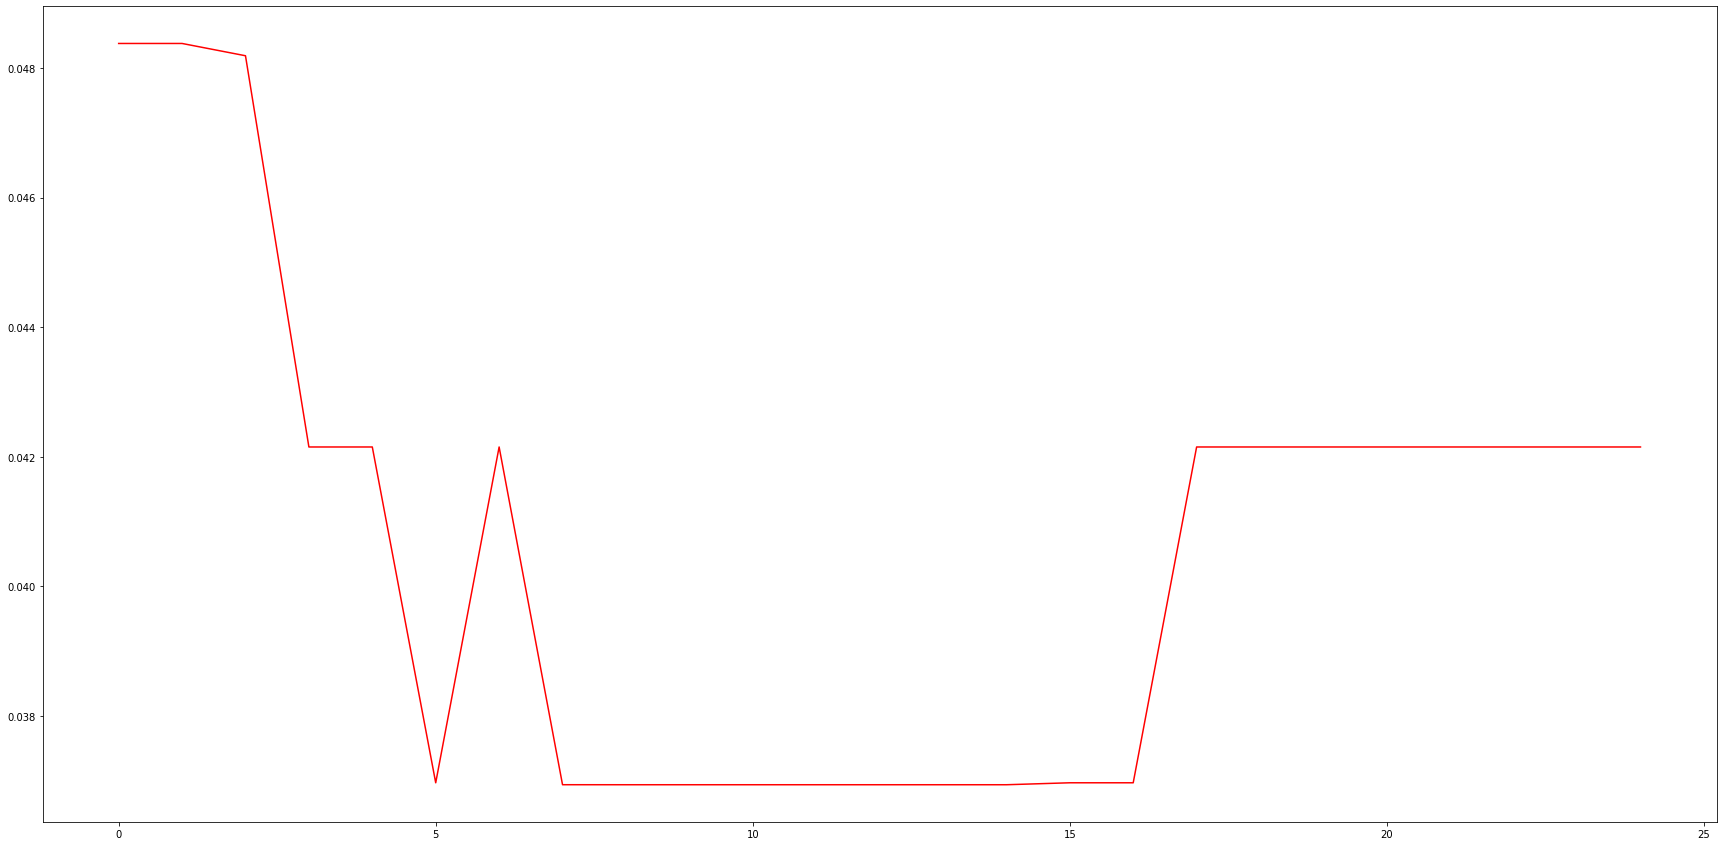

In [25]:
plt.figure(figsize=(30,15))
plt.plot(evolution,color='r')